<a href="https://colab.research.google.com/github/shonkhochil/Tensorflow-Bootcamp/blob/master/CNN_CIFAR10_TF2_0_Jose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train,10)

In [ ]:
y_cat_test = to_categorical(y_test,10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
model.fit(x_train, y_cat_train, epochs=10,
          validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5708 - accuracy: 0.4272 - val_loss: 1.2973 - val_accuracy: 0.5313
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.2617 - accuracy: 0.5536 - val_loss: 1.2127 - val_accuracy: 0.5707
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1434 - accuracy: 0.5964 - val_loss: 1.1598 - val_accuracy: 0.5834
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0530 - accuracy: 0.6319 - val_loss: 1.0880 - val_accuracy: 0.6143
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9831 - accuracy: 0.6559 - val_loss: 1.0042 - val_accuracy: 0.6499
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9229 - accuracy: 0.6773 - val_loss: 1.0332 - val_accuracy: 0.6434
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8780 - accuracy: 0.6920 - val_loss: 0.9662 -

In [ ]:
metrics = pd.DataFrame(model.history.history)
print(metrics)

       loss  accuracy  val_loss  val_accuracy
0  1.570795   0.42724  1.297295        0.5313
1  1.261702   0.55364  1.212659        0.5707
2  1.143399   0.59636  1.159828        0.5834
3  1.052994   0.63190  1.088005        0.6143
4  0.983134   0.65590  1.004196        0.6499
5  0.922850   0.67728  1.033200        0.6434
6  0.878039   0.69198  0.966163        0.6669
7  0.833288   0.70876  0.972532        0.6602
8  0.797615   0.71832  0.996479        0.6621


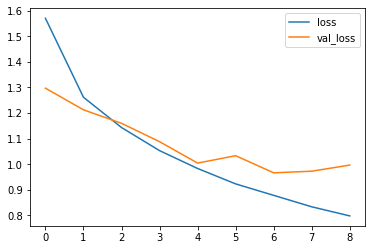

In [ ]:
metrics[['loss', 'val_loss']].plot()

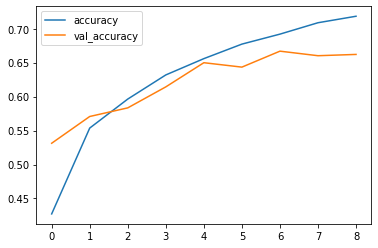

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9964792132377625, 0.6621000170707703]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1000
           1       0.77      0.79      0.78      1000
           2       0.66      0.44      0.53      1000
           3       0.46      0.46      0.46      1000
           4       0.55      0.66      0.60      1000
           5       0.53      0.62      0.57      1000
           6       0.67      0.81      0.74      1000
           7       0.73      0.70      0.71      1000
           8       0.81      0.73      0.76      1000
           9       0.80      0.68      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [ ]:
print(confusion_matrix(y_test, predictions))

[[735  25  34  38  31  13  18   7  63  36]
 [ 31 793   6  28   7   8  19   6  28  74]
 [ 72   5 439  67 144 109 100  43  13   8]
 [ 21   8  29 455 102 229 102  40  10   4]
 [ 32   4  50  55 662  48  67  70  10   2]
 [  9   7  34 145  75 623  45  55   3   4]
 [  7   2  32  58  49  29 814   6   3   0]
 [ 13   1  13  54  96  86  18 698   7  14]
 [ 87  62  16  39  16  11   9   8 727  25]
 [ 40 120  11  43  17  11  22  22  39 675]]
